In [73]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import catboost as cb
from sklearn.metrics import mean_squared_error, r2_score

!pip install catboost

In [74]:
df=pd.read_csv("PUBG_Game_Prediction_data.csv")
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [75]:
df.shape

(4446966, 29)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

# Data Descriptions

# Data weanling

### Check for the rows with missing win prediction value

In [77]:
df["winPlacePerc"].isnull().sum()

1

In [78]:
df[df["winPlacePerc"].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [79]:
df=df.drop(2744604)

### Understanding Players distribution in a game

In [80]:
df["PlayerJoined"]=df.groupby("matchId")["matchId"].transform('count')

In [81]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,PlayerJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


## Analysing Data

In [82]:
df["toalDistance"]=df["rideDistance"] + df["swimDistance"] + df["walkDistance"]

In [83]:
df["killwithoutMoving"]= ((df["kills"] >0) & (df["toalDistance"]==0))

In [84]:
df[df["killwithoutMoving"]==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,PlayerJoined,toalDistance,killwithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [85]:
df[df["killwithoutMoving"]==True].shape

(1535, 32)

In [86]:
df.drop(df[df["killwithoutMoving"]==True].index,inplace=True)

# Extra-ordinary Road Kills?????

In [87]:
df[df["roadKills"]>5].shape

(46, 32)

In [88]:
df.drop(df[df["roadKills"]>5].index ,inplace=True)

# So many KILLS - how ????

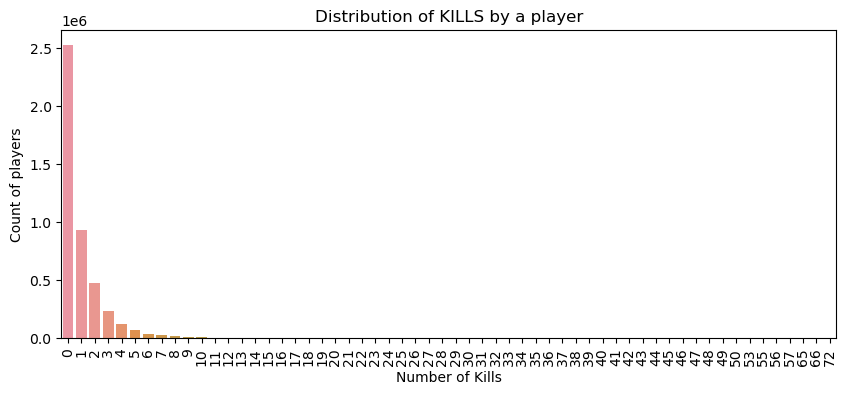

In [89]:
plt.figure(figsize=(10,4))
sns.countplot(data = df, x = df['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.xticks(rotation=90)
plt.show()

In [90]:
df[df["kills"]>20].shape

(417, 32)

In [91]:
df.drop(df[df["kills"]>20].index, inplace=True)

In [92]:
df['headshot_rate'] = df['headshotKills']/df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)

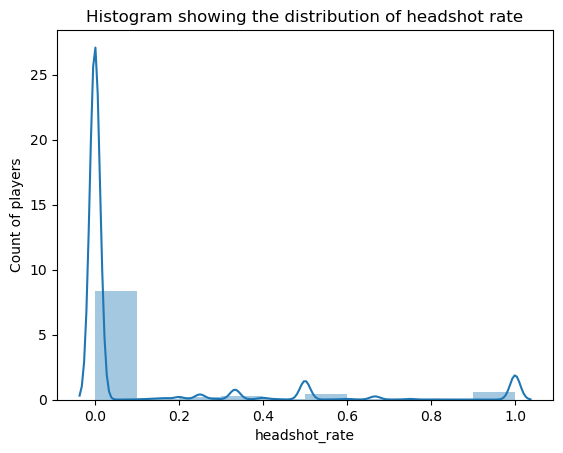

In [93]:

# plot the headshot rate distribution
sns.distplot(df['headshot_rate'], bins =10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of players")
plt.show()

In [94]:
df[(df['headshot_rate'] ==1) & (df['kills']>5)].shape

(187, 33)

In [95]:
df.drop(df[(df['headshot_rate'] ==1) & (df['kills']>5)].index ,inplace=True)

# Longest Shot

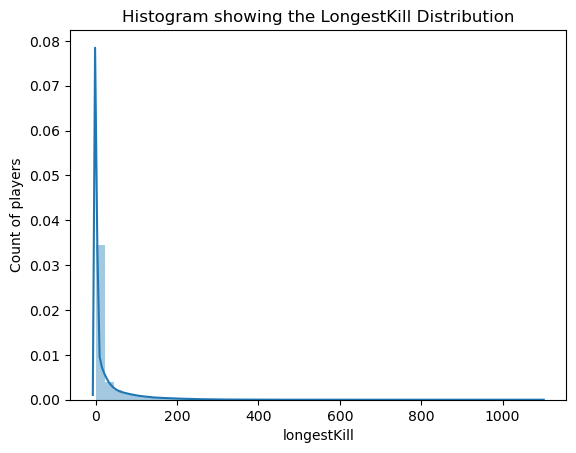

In [96]:
sns.distplot(df['longestKill'], bins = 50).set_title("Histogram showing the LongestKill Distribution")
plt.ylabel("Count of players")
plt.show()

In [97]:
df[df['longestKill']>=500].shape

(1738, 33)

In [98]:
df.drop(df[df['longestKill']>=500].index, inplace = True)

# Weapon Change

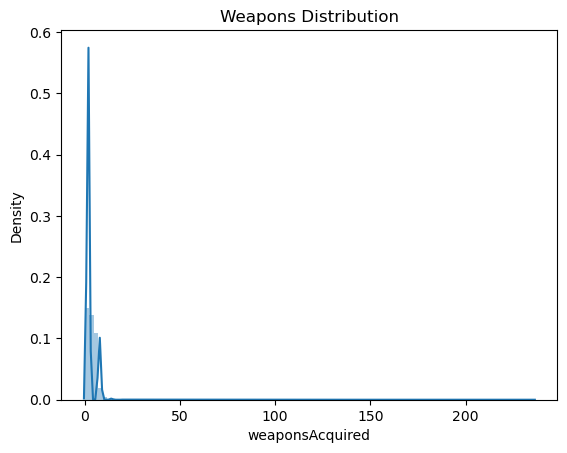

In [99]:
sns.distplot(df['weaponsAcquired'], bins=100).set_title("Weapons Distribution")
plt.show()

In [100]:
df[df['weaponsAcquired']>=15].shape

(6809, 33)

In [101]:
df.drop(df[df['weaponsAcquired']>=15].index, inplace = True)

# EDA

In [102]:
df.shape

(4436233, 33)

In [103]:
df.isna().sum()

Id                   0
groupId              0
matchId              0
assists              0
boosts               0
damageDealt          0
DBNOs                0
headshotKills        0
heals                0
killPlace            0
killPoints           0
kills                0
killStreaks          0
longestKill          0
matchDuration        0
matchType            0
maxPlace             0
numGroups            0
rankPoints           0
revives              0
rideDistance         0
roadKills            0
swimDistance         0
teamKills            0
vehicleDestroys      0
walkDistance         0
weaponsAcquired      0
winPoints            0
winPlacePerc         0
PlayerJoined         0
toalDistance         0
killwithoutMoving    0
headshot_rate        0
dtype: int64

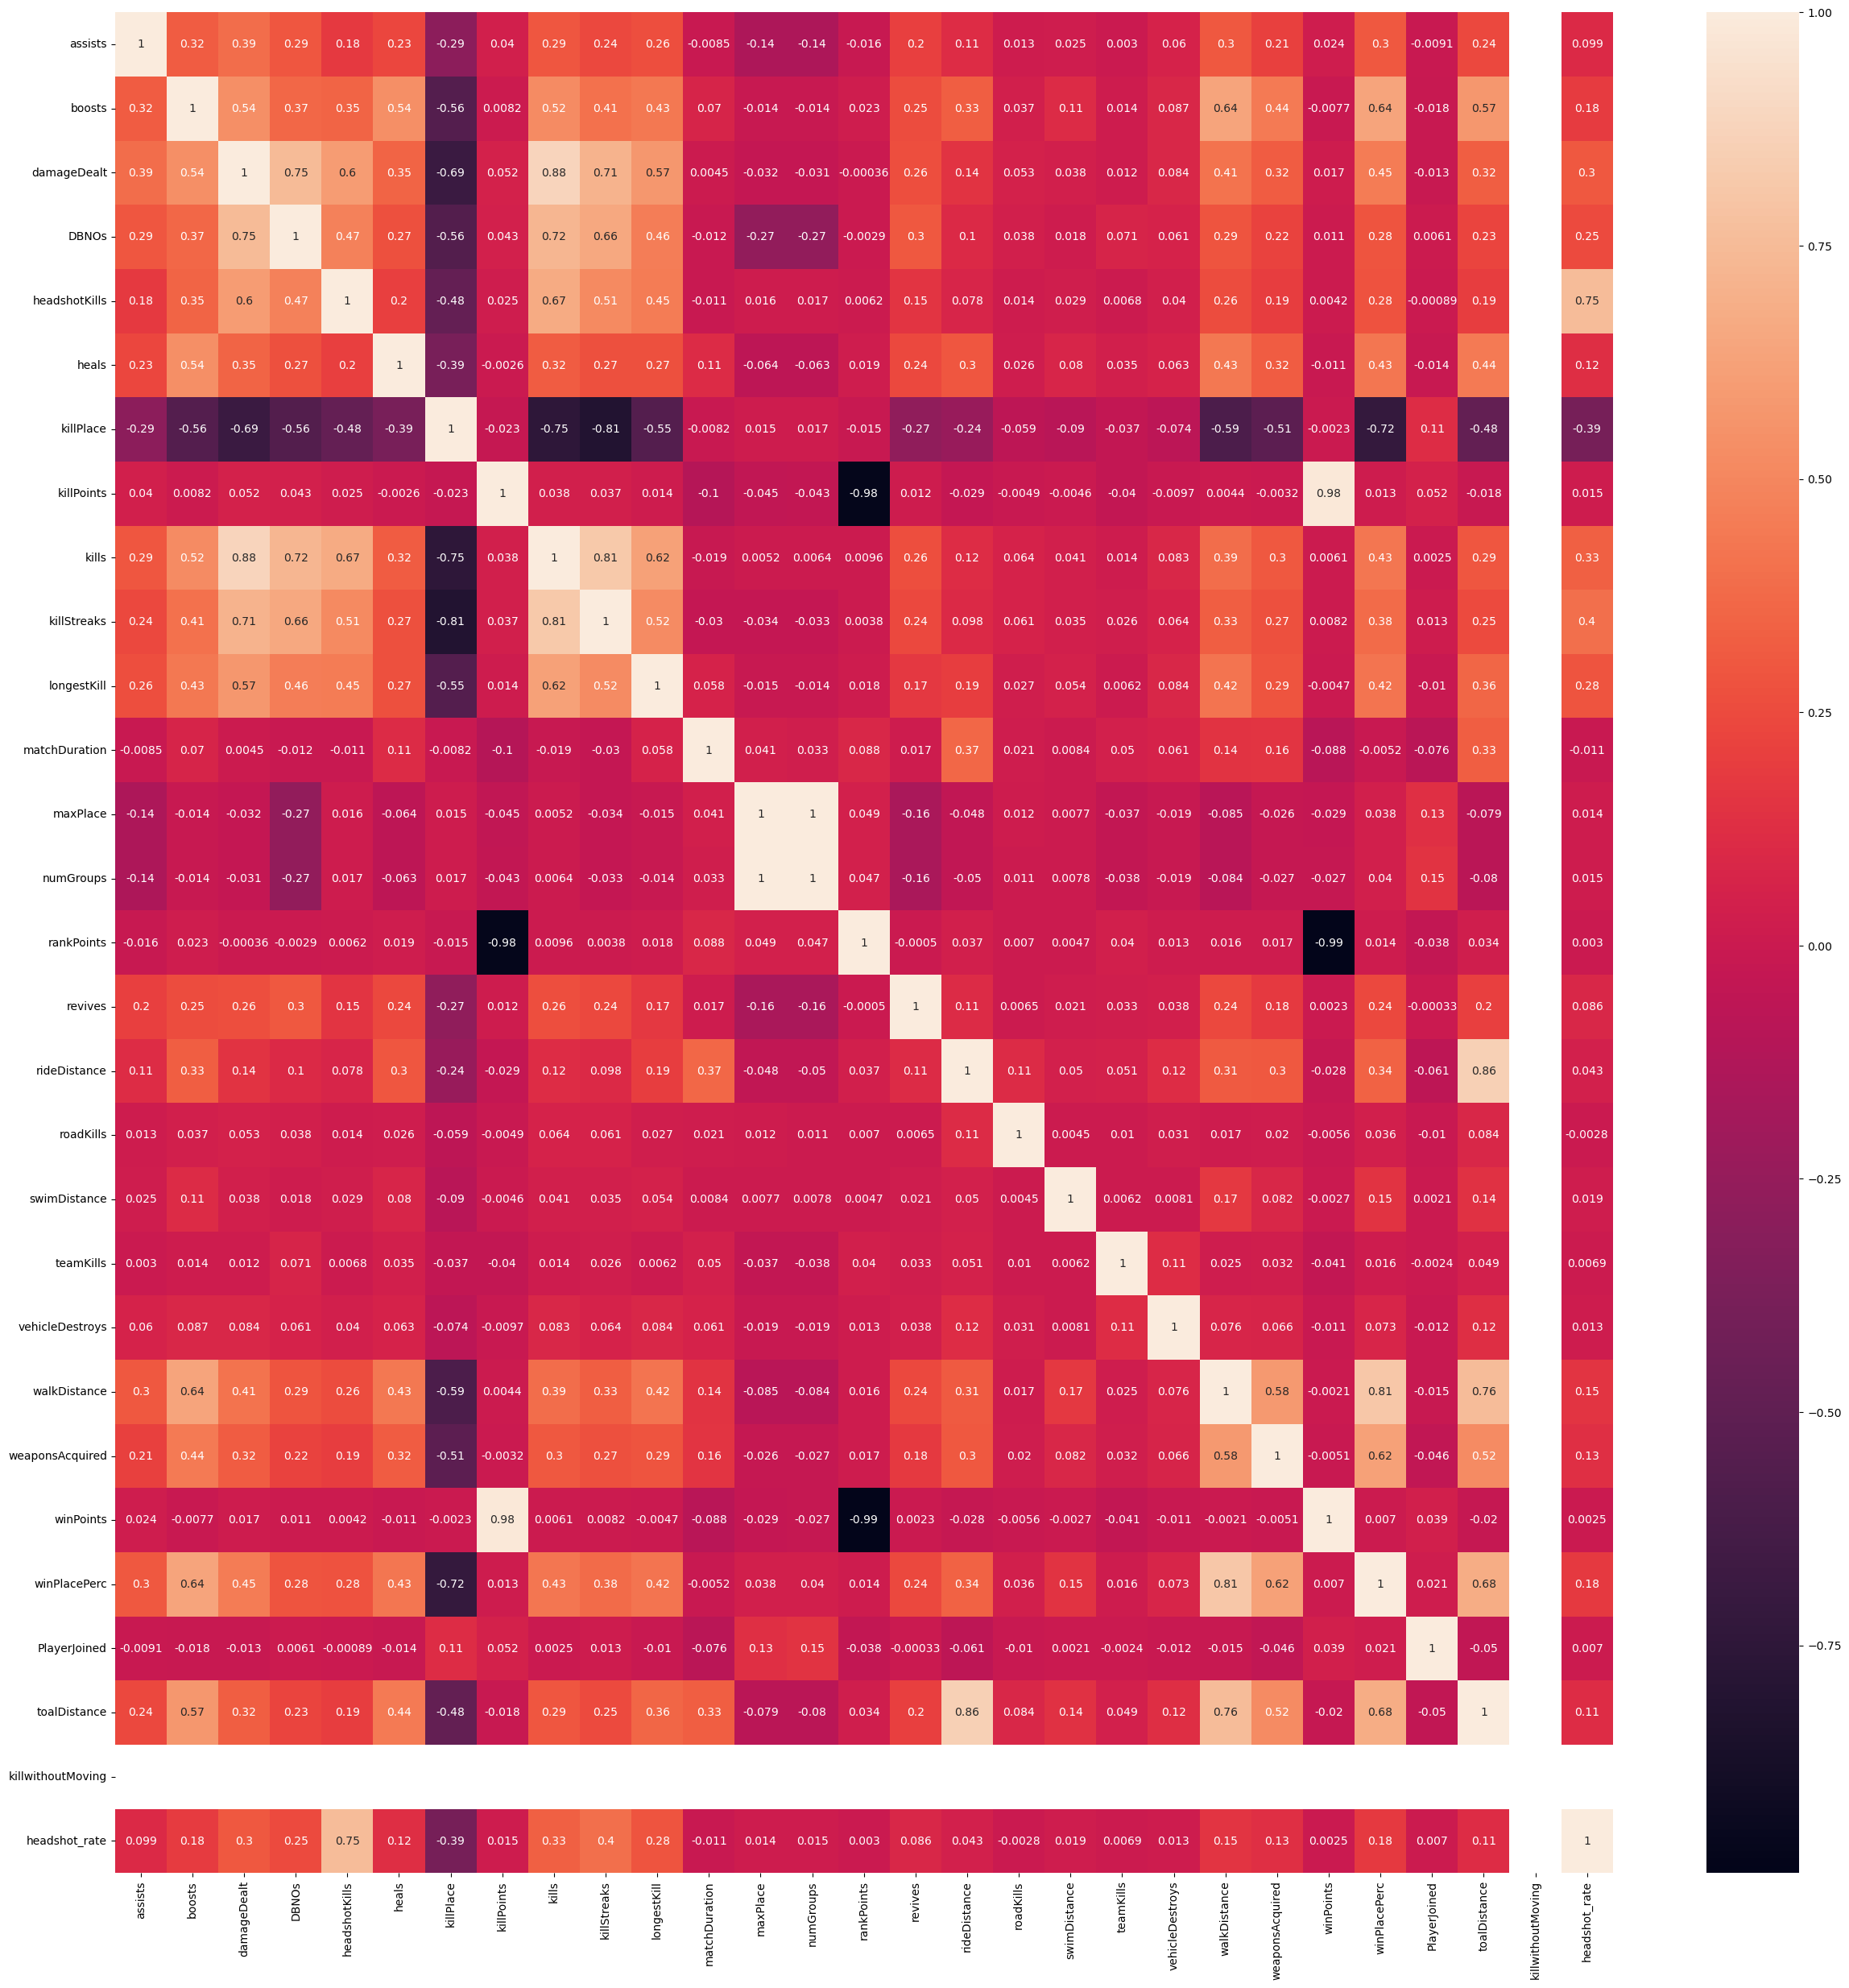

In [104]:
# correlation of parameter with Win Prediction
plt.figure(figsize=[30,30])
sns.heatmap(df.corr(), annot = True)
plt.show()

# Feature Engineering

In [105]:
normalising_factor = (100 - df['PlayerJoined']/100)+1

In [106]:
df['killsNorm'] = df['kills'] * normalising_factor
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor


df['traveldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [107]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'PlayerJoined',
       'toalDistance', 'killwithoutMoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [108]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])

In [109]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,toalDistance,killwithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


# ML - Catboost Model
#### Handling categorical data

In [110]:
x = data.drop(['winPlacePerc'], axis = 1)
y = data['winPlacePerc']

In [112]:
x = pd.get_dummies(x, columns = ['matchType', 'killwithoutMoving'])

In [113]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killwithoutMoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,57,0,0,0.00,25,1484,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,47,0,0,0.00,47,1491,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,75,0,0,0.00,30,1408,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,45,0,1,58.53,95,1560,0,0,...,0,0,0,0,0,0,1,0,0,1


In [114]:
x.shape

(4436233, 40)

In [115]:
features = x.columns

# Scaling the data

In [117]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))

In [118]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.582948,-0.384165,0.449324,1.172491,-0.765121,-0.459623,-0.732885,-1.212390,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405066,1.236181,0.0
1,-0.582948,-0.384165,0.340033,-0.804728,-0.765121,-0.459623,-0.775859,0.803565,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405066,1.236181,0.0
2,-0.582948,-0.384165,-0.024272,-0.804728,-0.765121,-0.459623,0.169559,0.813067,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405066,-0.808943,0.0
3,-0.582948,-0.384165,0.995782,-0.804728,-0.765121,-0.459623,-0.560991,0.700391,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405066,1.236181,0.0
4,-0.582948,-0.384165,-0.097133,-0.804728,0.647737,0.727503,2.232287,0.906738,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,2.696902,-0.405066,-0.808943,0.0


In [119]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size = 0.3, random_state = 0)

In [120]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(3105363, 40) (3105363,)
(1330870, 40) (1330870,)


# CatBoost Model

In [121]:
import catboost as cb

In [122]:
train_dataset = cb.Pool(xtrain, ytrain)
test_dataset = cb.Pool(xtest, ytest)

In [123]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [125]:
# GRID Search

grid = {'iterations': [100, 150], 
       'learning_rate': [0.03, 0.1], 
       'depth': [2, 4, 6, 8]}

model.grid_search(grid, train_dataset)

0:	learn: 0.5480985	test: 0.5486727	best: 0.5486727 (0)	total: 221ms	remaining: 21.9s
1:	learn: 0.5332354	test: 0.5337938	best: 0.5337938 (1)	total: 437ms	remaining: 21.4s
2:	learn: 0.5188656	test: 0.5194102	best: 0.5194102 (2)	total: 648ms	remaining: 20.9s
3:	learn: 0.5049623	test: 0.5054874	best: 0.5054874 (3)	total: 859ms	remaining: 20.6s
4:	learn: 0.4915250	test: 0.4920378	best: 0.4920378 (4)	total: 1.06s	remaining: 20.2s
5:	learn: 0.4785252	test: 0.4790259	best: 0.4790259 (5)	total: 1.28s	remaining: 20.1s
6:	learn: 0.4659407	test: 0.4664248	best: 0.4664248 (6)	total: 1.5s	remaining: 20s
7:	learn: 0.4537628	test: 0.4542307	best: 0.4542307 (7)	total: 1.71s	remaining: 19.7s
8:	learn: 0.4419502	test: 0.4424068	best: 0.4424068 (8)	total: 1.92s	remaining: 19.4s
9:	learn: 0.4305462	test: 0.4309894	best: 0.4309894 (9)	total: 2.13s	remaining: 19.1s
10:	learn: 0.4195114	test: 0.4199403	best: 0.4199403 (10)	total: 2.34s	remaining: 18.9s
11:	learn: 0.4088471	test: 0.4092662	best: 0.4092662 (1

94:	learn: 0.1398785	test: 0.1400839	best: 0.1400839 (94)	total: 20.4s	remaining: 1.07s
95:	learn: 0.1394491	test: 0.1396526	best: 0.1396526 (95)	total: 20.6s	remaining: 858ms
96:	learn: 0.1390744	test: 0.1392772	best: 0.1392772 (96)	total: 20.8s	remaining: 644ms
97:	learn: 0.1387091	test: 0.1389122	best: 0.1389122 (97)	total: 21.1s	remaining: 430ms
98:	learn: 0.1383604	test: 0.1385638	best: 0.1385638 (98)	total: 21.3s	remaining: 215ms
99:	learn: 0.1379820	test: 0.1381828	best: 0.1381828 (99)	total: 21.5s	remaining: 0us

bestTest = 0.1381827686
bestIteration = 99

0:	loss: 0.1381828	best: 0.1381828 (0)	total: 24.5s	remaining: 6m 7s
0:	learn: 0.5125243	test: 0.5130643	best: 0.5130643 (0)	total: 238ms	remaining: 23.5s
1:	learn: 0.4669825	test: 0.4674744	best: 0.4674744 (1)	total: 471ms	remaining: 23.1s
2:	learn: 0.4264523	test: 0.4268923	best: 0.4268923 (2)	total: 698ms	remaining: 22.6s
3:	learn: 0.3903065	test: 0.3907146	best: 0.3907146 (3)	total: 929ms	remaining: 22.3s
4:	learn: 0.3581

87:	learn: 0.1172563	test: 0.1173947	best: 0.1173947 (87)	total: 19.8s	remaining: 2.7s
88:	learn: 0.1171517	test: 0.1172898	best: 0.1172898 (88)	total: 20s	remaining: 2.47s
89:	learn: 0.1170664	test: 0.1172039	best: 0.1172039 (89)	total: 20.2s	remaining: 2.25s
90:	learn: 0.1169518	test: 0.1170901	best: 0.1170901 (90)	total: 20.4s	remaining: 2.02s
91:	learn: 0.1168578	test: 0.1169964	best: 0.1169964 (91)	total: 20.6s	remaining: 1.79s
92:	learn: 0.1167612	test: 0.1169003	best: 0.1169003 (92)	total: 20.9s	remaining: 1.57s
93:	learn: 0.1166168	test: 0.1167579	best: 0.1167579 (93)	total: 21.1s	remaining: 1.35s
94:	learn: 0.1163191	test: 0.1164587	best: 0.1164587 (94)	total: 21.3s	remaining: 1.12s
95:	learn: 0.1159557	test: 0.1160941	best: 0.1160941 (95)	total: 21.6s	remaining: 899ms
96:	learn: 0.1158679	test: 0.1160045	best: 0.1160045 (96)	total: 21.8s	remaining: 674ms
97:	learn: 0.1157348	test: 0.1158709	best: 0.1158709 (97)	total: 22s	remaining: 450ms
98:	learn: 0.1156595	test: 0.1157932	

80:	learn: 0.1472692	test: 0.1474771	best: 0.1474771 (80)	total: 19.1s	remaining: 16.3s
81:	learn: 0.1466207	test: 0.1468293	best: 0.1468293 (81)	total: 19.3s	remaining: 16s
82:	learn: 0.1459743	test: 0.1461815	best: 0.1461815 (82)	total: 19.6s	remaining: 15.8s
83:	learn: 0.1453204	test: 0.1455244	best: 0.1455244 (83)	total: 19.8s	remaining: 15.6s
84:	learn: 0.1447388	test: 0.1449422	best: 0.1449422 (84)	total: 20s	remaining: 15.3s
85:	learn: 0.1441806	test: 0.1443849	best: 0.1443849 (85)	total: 20.2s	remaining: 15.1s
86:	learn: 0.1436312	test: 0.1438346	best: 0.1438346 (86)	total: 20.5s	remaining: 14.8s
87:	learn: 0.1431169	test: 0.1433204	best: 0.1433204 (87)	total: 20.7s	remaining: 14.6s
88:	learn: 0.1425621	test: 0.1427639	best: 0.1427639 (88)	total: 20.9s	remaining: 14.4s
89:	learn: 0.1420758	test: 0.1422801	best: 0.1422801 (89)	total: 21.2s	remaining: 14.1s
90:	learn: 0.1416203	test: 0.1418252	best: 0.1418252 (90)	total: 21.4s	remaining: 13.9s
91:	learn: 0.1411662	test: 0.1413715

22:	learn: 0.1485703	test: 0.1487847	best: 0.1487847 (22)	total: 5.45s	remaining: 30.1s
23:	learn: 0.1461484	test: 0.1463559	best: 0.1463559 (23)	total: 5.69s	remaining: 29.9s
24:	learn: 0.1441674	test: 0.1443783	best: 0.1443783 (24)	total: 5.9s	remaining: 29.5s
25:	learn: 0.1423731	test: 0.1425812	best: 0.1425812 (25)	total: 6.13s	remaining: 29.2s
26:	learn: 0.1407098	test: 0.1409117	best: 0.1409117 (26)	total: 6.36s	remaining: 29s
27:	learn: 0.1393336	test: 0.1395363	best: 0.1395363 (27)	total: 6.61s	remaining: 28.8s
28:	learn: 0.1381116	test: 0.1383127	best: 0.1383127 (28)	total: 6.83s	remaining: 28.5s
29:	learn: 0.1370217	test: 0.1372254	best: 0.1372254 (29)	total: 7.05s	remaining: 28.2s
30:	learn: 0.1360388	test: 0.1362472	best: 0.1362472 (30)	total: 7.28s	remaining: 27.9s
31:	learn: 0.1351318	test: 0.1353442	best: 0.1353442 (31)	total: 7.52s	remaining: 27.7s
32:	learn: 0.1341731	test: 0.1343774	best: 0.1343774 (32)	total: 7.74s	remaining: 27.4s
33:	learn: 0.1334355	test: 0.133641

116:	learn: 0.1134851	test: 0.1136247	best: 0.1136247 (116)	total: 27.8s	remaining: 7.84s
117:	learn: 0.1131915	test: 0.1133379	best: 0.1133379 (117)	total: 28s	remaining: 7.61s
118:	learn: 0.1131210	test: 0.1132639	best: 0.1132639 (118)	total: 28.3s	remaining: 7.36s
119:	learn: 0.1130572	test: 0.1131989	best: 0.1131989 (119)	total: 28.5s	remaining: 7.12s
120:	learn: 0.1128526	test: 0.1129928	best: 0.1129928 (120)	total: 28.7s	remaining: 6.88s
121:	learn: 0.1125581	test: 0.1126932	best: 0.1126932 (121)	total: 29s	remaining: 6.65s
122:	learn: 0.1124156	test: 0.1125519	best: 0.1125519 (122)	total: 29.2s	remaining: 6.41s
123:	learn: 0.1123551	test: 0.1124910	best: 0.1124910 (123)	total: 29.4s	remaining: 6.17s
124:	learn: 0.1122496	test: 0.1123881	best: 0.1123881 (124)	total: 29.6s	remaining: 5.92s
125:	learn: 0.1121981	test: 0.1123371	best: 0.1123371 (125)	total: 29.8s	remaining: 5.68s
126:	learn: 0.1121349	test: 0.1122735	best: 0.1122735 (126)	total: 30.1s	remaining: 5.45s
127:	learn: 0.

58:	learn: 0.1569715	test: 0.1571276	best: 0.1571276 (58)	total: 21.3s	remaining: 14.8s
59:	learn: 0.1551102	test: 0.1552652	best: 0.1552652 (59)	total: 21.6s	remaining: 14.4s
60:	learn: 0.1533749	test: 0.1535279	best: 0.1535279 (60)	total: 21.9s	remaining: 14s
61:	learn: 0.1517226	test: 0.1518742	best: 0.1518742 (61)	total: 22.3s	remaining: 13.7s
62:	learn: 0.1500927	test: 0.1502434	best: 0.1502434 (62)	total: 22.6s	remaining: 13.3s
63:	learn: 0.1485822	test: 0.1487318	best: 0.1487318 (63)	total: 22.9s	remaining: 12.9s
64:	learn: 0.1469572	test: 0.1471045	best: 0.1471045 (64)	total: 23.3s	remaining: 12.5s
65:	learn: 0.1455402	test: 0.1456858	best: 0.1456858 (65)	total: 23.6s	remaining: 12.2s
66:	learn: 0.1441948	test: 0.1443380	best: 0.1443380 (66)	total: 23.9s	remaining: 11.8s
67:	learn: 0.1428725	test: 0.1430147	best: 0.1430147 (67)	total: 24.3s	remaining: 11.4s
68:	learn: 0.1416351	test: 0.1417744	best: 0.1417744 (68)	total: 24.6s	remaining: 11.1s
69:	learn: 0.1404738	test: 0.14061

51:	learn: 0.1070878	test: 0.1071367	best: 0.1071367 (51)	total: 17.4s	remaining: 16.1s
52:	learn: 0.1065475	test: 0.1065917	best: 0.1065917 (52)	total: 17.8s	remaining: 15.8s
53:	learn: 0.1060287	test: 0.1060726	best: 0.1060726 (53)	total: 18.2s	remaining: 15.5s
54:	learn: 0.1058104	test: 0.1058530	best: 0.1058530 (54)	total: 18.6s	remaining: 15.2s
55:	learn: 0.1055225	test: 0.1055626	best: 0.1055626 (55)	total: 18.9s	remaining: 14.9s
56:	learn: 0.1053061	test: 0.1053483	best: 0.1053483 (56)	total: 19.2s	remaining: 14.5s
57:	learn: 0.1051554	test: 0.1051960	best: 0.1051960 (57)	total: 19.5s	remaining: 14.1s
58:	learn: 0.1048423	test: 0.1048867	best: 0.1048867 (58)	total: 19.8s	remaining: 13.8s
59:	learn: 0.1043634	test: 0.1044075	best: 0.1044075 (59)	total: 20.2s	remaining: 13.5s
60:	learn: 0.1041998	test: 0.1042419	best: 0.1042419 (60)	total: 20.5s	remaining: 13.1s
61:	learn: 0.1039218	test: 0.1039702	best: 0.1039702 (61)	total: 20.9s	remaining: 12.8s
62:	learn: 0.1035672	test: 0.103

44:	learn: 0.1926147	test: 0.1927970	best: 0.1927970 (44)	total: 15.9s	remaining: 37.2s
45:	learn: 0.1893732	test: 0.1895540	best: 0.1895540 (45)	total: 16.3s	remaining: 36.9s
46:	learn: 0.1862437	test: 0.1864222	best: 0.1864222 (46)	total: 16.7s	remaining: 36.6s
47:	learn: 0.1832424	test: 0.1834185	best: 0.1834185 (47)	total: 17s	remaining: 36.2s
48:	learn: 0.1803691	test: 0.1805440	best: 0.1805440 (48)	total: 17.4s	remaining: 35.9s
49:	learn: 0.1776500	test: 0.1778244	best: 0.1778244 (49)	total: 17.7s	remaining: 35.5s
50:	learn: 0.1750070	test: 0.1751812	best: 0.1751812 (50)	total: 18.1s	remaining: 35.1s
51:	learn: 0.1723344	test: 0.1725048	best: 0.1725048 (51)	total: 18.4s	remaining: 34.7s
52:	learn: 0.1698896	test: 0.1700583	best: 0.1700583 (52)	total: 18.8s	remaining: 34.4s
53:	learn: 0.1674047	test: 0.1675683	best: 0.1675683 (53)	total: 19.2s	remaining: 34.1s
54:	learn: 0.1651358	test: 0.1652965	best: 0.1652965 (54)	total: 19.5s	remaining: 33.7s
55:	learn: 0.1629034	test: 0.16306

137:	learn: 0.1112316	test: 0.1113297	best: 0.1113297 (137)	total: 46.6s	remaining: 4.05s
138:	learn: 0.1110783	test: 0.1111761	best: 0.1111761 (138)	total: 46.9s	remaining: 3.71s
139:	learn: 0.1109655	test: 0.1110613	best: 0.1110613 (139)	total: 47.2s	remaining: 3.37s
140:	learn: 0.1108417	test: 0.1109358	best: 0.1109358 (140)	total: 47.5s	remaining: 3.03s
141:	learn: 0.1107150	test: 0.1108085	best: 0.1108085 (141)	total: 47.8s	remaining: 2.69s
142:	learn: 0.1105818	test: 0.1106737	best: 0.1106737 (142)	total: 48.1s	remaining: 2.35s
143:	learn: 0.1104667	test: 0.1105577	best: 0.1105577 (143)	total: 48.4s	remaining: 2.02s
144:	learn: 0.1103654	test: 0.1104547	best: 0.1104547 (144)	total: 48.7s	remaining: 1.68s
145:	learn: 0.1101236	test: 0.1102130	best: 0.1102130 (145)	total: 49.1s	remaining: 1.34s
146:	learn: 0.1100319	test: 0.1101212	best: 0.1101212 (146)	total: 49.4s	remaining: 1.01s
147:	learn: 0.1099452	test: 0.1100330	best: 0.1100330 (147)	total: 49.7s	remaining: 671ms
148:	learn

80:	learn: 0.0991883	test: 0.0992042	best: 0.0992042 (80)	total: 26.5s	remaining: 22.6s
81:	learn: 0.0988635	test: 0.0988821	best: 0.0988821 (81)	total: 26.9s	remaining: 22.3s
82:	learn: 0.0986516	test: 0.0986708	best: 0.0986708 (82)	total: 27.2s	remaining: 22s
83:	learn: 0.0983646	test: 0.0983792	best: 0.0983792 (83)	total: 27.5s	remaining: 21.6s
84:	learn: 0.0982653	test: 0.0982803	best: 0.0982803 (84)	total: 27.8s	remaining: 21.3s
85:	learn: 0.0981768	test: 0.0981890	best: 0.0981890 (85)	total: 28.1s	remaining: 20.9s
86:	learn: 0.0979695	test: 0.0979851	best: 0.0979851 (86)	total: 28.5s	remaining: 20.6s
87:	learn: 0.0978567	test: 0.0978717	best: 0.0978717 (87)	total: 28.8s	remaining: 20.3s
88:	learn: 0.0977738	test: 0.0977853	best: 0.0977853 (88)	total: 29.1s	remaining: 19.9s
89:	learn: 0.0976314	test: 0.0976395	best: 0.0976395 (89)	total: 29.3s	remaining: 19.6s
90:	learn: 0.0975267	test: 0.0975381	best: 0.0975381 (90)	total: 29.6s	remaining: 19.2s
91:	learn: 0.0973435	test: 0.09735

22:	learn: 0.3015593	test: 0.3018181	best: 0.3018181 (22)	total: 10.8s	remaining: 36.2s
23:	learn: 0.2940882	test: 0.2943396	best: 0.2943396 (23)	total: 11.3s	remaining: 35.8s
24:	learn: 0.2868629	test: 0.2871060	best: 0.2871060 (24)	total: 11.8s	remaining: 35.4s
25:	learn: 0.2799016	test: 0.2801370	best: 0.2801370 (25)	total: 12.2s	remaining: 34.8s
26:	learn: 0.2731548	test: 0.2733822	best: 0.2733822 (26)	total: 12.7s	remaining: 34.3s
27:	learn: 0.2665929	test: 0.2668118	best: 0.2668118 (27)	total: 13.2s	remaining: 33.9s
28:	learn: 0.2603294	test: 0.2605427	best: 0.2605427 (28)	total: 13.6s	remaining: 33.4s
29:	learn: 0.2542823	test: 0.2544902	best: 0.2544902 (29)	total: 14.1s	remaining: 32.9s
30:	learn: 0.2484089	test: 0.2486103	best: 0.2486103 (30)	total: 14.5s	remaining: 32.4s
31:	learn: 0.2427337	test: 0.2429290	best: 0.2429290 (31)	total: 15s	remaining: 31.9s
32:	learn: 0.2372368	test: 0.2374238	best: 0.2374238 (32)	total: 15.5s	remaining: 31.5s
33:	learn: 0.2319237	test: 0.23210

15:	learn: 0.1560161	test: 0.1561359	best: 0.1561359 (15)	total: 7.88s	remaining: 41.4s
16:	learn: 0.1484486	test: 0.1485656	best: 0.1485656 (16)	total: 8.38s	remaining: 40.9s
17:	learn: 0.1420534	test: 0.1421677	best: 0.1421677 (17)	total: 8.83s	remaining: 40.2s
18:	learn: 0.1365002	test: 0.1366136	best: 0.1366136 (18)	total: 9.29s	remaining: 39.6s
19:	learn: 0.1317855	test: 0.1318974	best: 0.1318974 (19)	total: 9.74s	remaining: 39s
20:	learn: 0.1277943	test: 0.1279013	best: 0.1279013 (20)	total: 10.1s	remaining: 38.1s
21:	learn: 0.1244136	test: 0.1245098	best: 0.1245098 (21)	total: 10.6s	remaining: 37.4s
22:	learn: 0.1211141	test: 0.1212148	best: 0.1212148 (22)	total: 11s	remaining: 37s
23:	learn: 0.1185074	test: 0.1186060	best: 0.1186060 (23)	total: 11.5s	remaining: 36.4s
24:	learn: 0.1160512	test: 0.1161569	best: 0.1161569 (24)	total: 12s	remaining: 35.9s
25:	learn: 0.1141803	test: 0.1142874	best: 0.1142874 (25)	total: 12.4s	remaining: 35.2s
26:	learn: 0.1124700	test: 0.1125769	bes

8:	learn: 0.4373502	test: 0.4377813	best: 0.4377813 (8)	total: 4.36s	remaining: 1m 8s
9:	learn: 0.4254259	test: 0.4258369	best: 0.4258369 (9)	total: 4.84s	remaining: 1m 7s
10:	learn: 0.4139237	test: 0.4143186	best: 0.4143186 (10)	total: 5.29s	remaining: 1m 6s
11:	learn: 0.4028091	test: 0.4031886	best: 0.4031886 (11)	total: 5.74s	remaining: 1m 5s
12:	learn: 0.3919950	test: 0.3923603	best: 0.3923603 (12)	total: 6.2s	remaining: 1m 5s
13:	learn: 0.3815952	test: 0.3819459	best: 0.3819459 (13)	total: 6.66s	remaining: 1m 4s
14:	learn: 0.3714472	test: 0.3717830	best: 0.3717830 (14)	total: 7.13s	remaining: 1m 4s
15:	learn: 0.3616442	test: 0.3619717	best: 0.3619717 (15)	total: 7.61s	remaining: 1m 3s
16:	learn: 0.3521996	test: 0.3525162	best: 0.3525162 (16)	total: 8.09s	remaining: 1m 3s
17:	learn: 0.3430246	test: 0.3433309	best: 0.3433309 (17)	total: 8.55s	remaining: 1m 2s
18:	learn: 0.3341995	test: 0.3344937	best: 0.3344937 (18)	total: 9.02s	remaining: 1m 2s
19:	learn: 0.3255933	test: 0.3258761	

102:	learn: 0.1081169	test: 0.1081758	best: 0.1081758 (102)	total: 46.9s	remaining: 21.4s
103:	learn: 0.1078243	test: 0.1078816	best: 0.1078816 (103)	total: 47.2s	remaining: 20.9s
104:	learn: 0.1075095	test: 0.1075661	best: 0.1075661 (104)	total: 47.7s	remaining: 20.4s
105:	learn: 0.1072368	test: 0.1072931	best: 0.1072931 (105)	total: 48.1s	remaining: 20s
106:	learn: 0.1069631	test: 0.1070168	best: 0.1070168 (106)	total: 48.5s	remaining: 19.5s
107:	learn: 0.1067074	test: 0.1067592	best: 0.1067592 (107)	total: 48.9s	remaining: 19s
108:	learn: 0.1063791	test: 0.1064321	best: 0.1064321 (108)	total: 49.4s	remaining: 18.6s
109:	learn: 0.1060924	test: 0.1061455	best: 0.1061455 (109)	total: 49.8s	remaining: 18.1s
110:	learn: 0.1058295	test: 0.1058794	best: 0.1058794 (110)	total: 50.2s	remaining: 17.6s
111:	learn: 0.1054732	test: 0.1055224	best: 0.1055224 (111)	total: 50.7s	remaining: 17.2s
112:	learn: 0.1051654	test: 0.1052120	best: 0.1052120 (112)	total: 51.1s	remaining: 16.7s
113:	learn: 0.

44:	learn: 0.0983833	test: 0.0984305	best: 0.0984305 (44)	total: 19.8s	remaining: 46.2s
45:	learn: 0.0979568	test: 0.0979996	best: 0.0979996 (45)	total: 20.3s	remaining: 45.8s
46:	learn: 0.0976773	test: 0.0977217	best: 0.0977217 (46)	total: 20.6s	remaining: 45.2s
47:	learn: 0.0972445	test: 0.0972879	best: 0.0972879 (47)	total: 21.1s	remaining: 44.8s
48:	learn: 0.0969617	test: 0.0970064	best: 0.0970064 (48)	total: 21.5s	remaining: 44.4s
49:	learn: 0.0966018	test: 0.0966368	best: 0.0966368 (49)	total: 21.9s	remaining: 43.9s
50:	learn: 0.0962342	test: 0.0962701	best: 0.0962701 (50)	total: 22.4s	remaining: 43.5s
51:	learn: 0.0959045	test: 0.0959379	best: 0.0959379 (51)	total: 22.7s	remaining: 42.8s
52:	learn: 0.0955201	test: 0.0955519	best: 0.0955519 (52)	total: 23.1s	remaining: 42.3s
53:	learn: 0.0952359	test: 0.0952744	best: 0.0952744 (53)	total: 23.6s	remaining: 41.9s
54:	learn: 0.0950596	test: 0.0950991	best: 0.0950991 (54)	total: 23.9s	remaining: 41.3s
55:	learn: 0.0947162	test: 0.094

137:	learn: 0.0851285	test: 0.0851100	best: 0.0851100 (137)	total: 58.2s	remaining: 5.06s
138:	learn: 0.0850857	test: 0.0850684	best: 0.0850684 (138)	total: 58.6s	remaining: 4.64s
139:	learn: 0.0850402	test: 0.0850225	best: 0.0850225 (139)	total: 59.1s	remaining: 4.22s
140:	learn: 0.0850014	test: 0.0849824	best: 0.0849824 (140)	total: 59.5s	remaining: 3.8s
141:	learn: 0.0849803	test: 0.0849611	best: 0.0849611 (141)	total: 59.9s	remaining: 3.37s
142:	learn: 0.0849428	test: 0.0849233	best: 0.0849233 (142)	total: 1m	remaining: 2.95s
143:	learn: 0.0848538	test: 0.0848334	best: 0.0848334 (143)	total: 1m	remaining: 2.53s
144:	learn: 0.0848212	test: 0.0847977	best: 0.0847977 (144)	total: 1m 1s	remaining: 2.11s
145:	learn: 0.0847817	test: 0.0847601	best: 0.0847601 (145)	total: 1m 1s	remaining: 1.69s
146:	learn: 0.0847224	test: 0.0847007	best: 0.0847007 (146)	total: 1m 1s	remaining: 1.26s
147:	learn: 0.0846818	test: 0.0846601	best: 0.0846601 (147)	total: 1m 2s	remaining: 842ms
148:	learn: 0.084

79:	learn: 0.1132791	test: 0.1133333	best: 0.1133333 (79)	total: 47.1s	remaining: 11.8s
80:	learn: 0.1124924	test: 0.1125446	best: 0.1125446 (80)	total: 47.6s	remaining: 11.2s
81:	learn: 0.1117309	test: 0.1117823	best: 0.1117823 (81)	total: 48.1s	remaining: 10.6s
82:	learn: 0.1110120	test: 0.1110629	best: 0.1110629 (82)	total: 48.6s	remaining: 9.95s
83:	learn: 0.1103213	test: 0.1103715	best: 0.1103715 (83)	total: 49.1s	remaining: 9.35s
84:	learn: 0.1095875	test: 0.1096332	best: 0.1096332 (84)	total: 49.6s	remaining: 8.75s
85:	learn: 0.1089161	test: 0.1089602	best: 0.1089602 (85)	total: 50.1s	remaining: 8.15s
86:	learn: 0.1083140	test: 0.1083581	best: 0.1083581 (86)	total: 50.6s	remaining: 7.56s
87:	learn: 0.1076346	test: 0.1076759	best: 0.1076759 (87)	total: 51.1s	remaining: 6.96s
88:	learn: 0.1070863	test: 0.1071272	best: 0.1071272 (88)	total: 51.6s	remaining: 6.37s
89:	learn: 0.1065664	test: 0.1066067	best: 0.1066067 (89)	total: 52.1s	remaining: 5.79s
90:	learn: 0.1059674	test: 0.106

72:	learn: 0.0864356	test: 0.0863970	best: 0.0863970 (72)	total: 38.7s	remaining: 14.3s
73:	learn: 0.0863397	test: 0.0863043	best: 0.0863043 (73)	total: 39.1s	remaining: 13.7s
74:	learn: 0.0862577	test: 0.0862200	best: 0.0862200 (74)	total: 39.6s	remaining: 13.2s
75:	learn: 0.0861573	test: 0.0861202	best: 0.0861202 (75)	total: 40.1s	remaining: 12.7s
76:	learn: 0.0860523	test: 0.0860150	best: 0.0860150 (76)	total: 40.5s	remaining: 12.1s
77:	learn: 0.0859487	test: 0.0859133	best: 0.0859133 (77)	total: 41.1s	remaining: 11.6s
78:	learn: 0.0858216	test: 0.0857885	best: 0.0857885 (78)	total: 41.6s	remaining: 11s
79:	learn: 0.0856956	test: 0.0856606	best: 0.0856606 (79)	total: 42s	remaining: 10.5s
80:	learn: 0.0855953	test: 0.0855601	best: 0.0855601 (80)	total: 42.4s	remaining: 9.95s
81:	learn: 0.0854888	test: 0.0854528	best: 0.0854528 (81)	total: 43s	remaining: 9.44s
82:	learn: 0.0853650	test: 0.0853268	best: 0.0853268 (82)	total: 43.5s	remaining: 8.92s
83:	learn: 0.0852965	test: 0.0852563	b

65:	learn: 0.1292302	test: 0.1293087	best: 0.1293087 (65)	total: 37.2s	remaining: 47.3s
66:	learn: 0.1277281	test: 0.1278075	best: 0.1278075 (66)	total: 37.7s	remaining: 46.7s
67:	learn: 0.1262733	test: 0.1263473	best: 0.1263473 (67)	total: 38.3s	remaining: 46.1s
68:	learn: 0.1249196	test: 0.1249916	best: 0.1249916 (68)	total: 38.9s	remaining: 45.6s
69:	learn: 0.1235776	test: 0.1236482	best: 0.1236482 (69)	total: 39.4s	remaining: 45s
70:	learn: 0.1223394	test: 0.1224084	best: 0.1224084 (70)	total: 39.9s	remaining: 44.4s
71:	learn: 0.1211238	test: 0.1211926	best: 0.1211926 (71)	total: 40.5s	remaining: 43.9s
72:	learn: 0.1199942	test: 0.1200606	best: 0.1200606 (72)	total: 41s	remaining: 43.2s
73:	learn: 0.1188687	test: 0.1189332	best: 0.1189332 (73)	total: 41.5s	remaining: 42.7s
74:	learn: 0.1178439	test: 0.1179062	best: 0.1179062 (74)	total: 42.1s	remaining: 42.1s
75:	learn: 0.1168058	test: 0.1168663	best: 0.1168663 (75)	total: 42.7s	remaining: 41.6s
76:	learn: 0.1158612	test: 0.1159193

6:	learn: 0.2898372	test: 0.2900759	best: 0.2900759 (6)	total: 8.03s	remaining: 2m 44s
7:	learn: 0.2656512	test: 0.2658610	best: 0.2658610 (7)	total: 9.28s	remaining: 2m 44s
8:	learn: 0.2440436	test: 0.2442277	best: 0.2442277 (8)	total: 10.5s	remaining: 2m 44s
9:	learn: 0.2250036	test: 0.2251599	best: 0.2251599 (9)	total: 11.7s	remaining: 2m 43s
10:	learn: 0.2080822	test: 0.2082354	best: 0.2082354 (10)	total: 12.9s	remaining: 2m 43s
11:	learn: 0.1932746	test: 0.1934183	best: 0.1934183 (11)	total: 14.2s	remaining: 2m 42s
12:	learn: 0.1801370	test: 0.1802593	best: 0.1802593 (12)	total: 15.6s	remaining: 2m 44s
13:	learn: 0.1685781	test: 0.1686864	best: 0.1686864 (13)	total: 17s	remaining: 2m 45s
14:	learn: 0.1585249	test: 0.1586230	best: 0.1586230 (14)	total: 18.3s	remaining: 2m 44s
15:	learn: 0.1497909	test: 0.1498796	best: 0.1498796 (15)	total: 19.4s	remaining: 2m 42s
16:	learn: 0.1422600	test: 0.1423485	best: 0.1423485 (16)	total: 20.6s	remaining: 2m 41s
17:	learn: 0.1357865	test: 0.13

99:	learn: 0.0841764	test: 0.0841381	best: 0.0841381 (99)	total: 1m 53s	remaining: 57s
100:	learn: 0.0840986	test: 0.0840583	best: 0.0840583 (100)	total: 1m 54s	remaining: 55.7s
101:	learn: 0.0840444	test: 0.0840053	best: 0.0840053 (101)	total: 1m 55s	remaining: 54.5s
102:	learn: 0.0839625	test: 0.0839215	best: 0.0839215 (102)	total: 1m 56s	remaining: 53.2s
103:	learn: 0.0839262	test: 0.0838881	best: 0.0838881 (103)	total: 1m 57s	remaining: 51.9s
104:	learn: 0.0838929	test: 0.0838555	best: 0.0838555 (104)	total: 1m 58s	remaining: 50.8s
105:	learn: 0.0838446	test: 0.0838081	best: 0.0838081 (105)	total: 1m 59s	remaining: 49.6s
106:	learn: 0.0837596	test: 0.0837236	best: 0.0837236 (106)	total: 2m	remaining: 48.5s
107:	learn: 0.0836822	test: 0.0836476	best: 0.0836476 (107)	total: 2m 1s	remaining: 47.4s
108:	learn: 0.0836316	test: 0.0835963	best: 0.0835963 (108)	total: 2m 3s	remaining: 46.3s
109:	learn: 0.0835793	test: 0.0835447	best: 0.0835447 (109)	total: 2m 4s	remaining: 45.2s
110:	learn

39:	learn: 0.0937539	test: 0.0937914	best: 0.0937914 (39)	total: 36.3s	remaining: 1m 39s
40:	learn: 0.0933491	test: 0.0933890	best: 0.0933890 (40)	total: 37.2s	remaining: 1m 38s
41:	learn: 0.0929901	test: 0.0930311	best: 0.0930311 (41)	total: 38s	remaining: 1m 37s
42:	learn: 0.0926175	test: 0.0926564	best: 0.0926564 (42)	total: 38.7s	remaining: 1m 36s
43:	learn: 0.0923133	test: 0.0923576	best: 0.0923576 (43)	total: 39.5s	remaining: 1m 35s
44:	learn: 0.0919938	test: 0.0920379	best: 0.0920379 (44)	total: 40.3s	remaining: 1m 33s
45:	learn: 0.0916613	test: 0.0917136	best: 0.0917136 (45)	total: 41.1s	remaining: 1m 32s
46:	learn: 0.0913172	test: 0.0913720	best: 0.0913720 (46)	total: 41.9s	remaining: 1m 31s
47:	learn: 0.0911079	test: 0.0911610	best: 0.0911610 (47)	total: 42.7s	remaining: 1m 30s
48:	learn: 0.0908429	test: 0.0908997	best: 0.0908997 (48)	total: 43.8s	remaining: 1m 30s
49:	learn: 0.0904845	test: 0.0905486	best: 0.0905486 (49)	total: 45s	remaining: 1m 29s
50:	learn: 0.0902110	test

131:	learn: 0.0827370	test: 0.0829586	best: 0.0829586 (131)	total: 1m 52s	remaining: 15.3s
132:	learn: 0.0827037	test: 0.0829245	best: 0.0829245 (132)	total: 1m 53s	remaining: 14.5s
133:	learn: 0.0826823	test: 0.0829061	best: 0.0829061 (133)	total: 1m 54s	remaining: 13.7s
134:	learn: 0.0826445	test: 0.0828686	best: 0.0828686 (134)	total: 1m 55s	remaining: 12.8s
135:	learn: 0.0826196	test: 0.0828447	best: 0.0828447 (135)	total: 1m 56s	remaining: 12s
136:	learn: 0.0825741	test: 0.0828012	best: 0.0828012 (136)	total: 1m 56s	remaining: 11.1s
137:	learn: 0.0825290	test: 0.0827558	best: 0.0827558 (137)	total: 1m 57s	remaining: 10.2s
138:	learn: 0.0825010	test: 0.0827275	best: 0.0827275 (138)	total: 1m 58s	remaining: 9.39s
139:	learn: 0.0824673	test: 0.0826959	best: 0.0826959 (139)	total: 1m 59s	remaining: 8.54s
140:	learn: 0.0824215	test: 0.0826512	best: 0.0826512 (140)	total: 2m	remaining: 7.69s
141:	learn: 0.0823919	test: 0.0826249	best: 0.0826249 (141)	total: 2m 1s	remaining: 6.83s
142:	l

73:	learn: 0.0864525	test: 0.0865608	best: 0.0865608 (73)	total: 1m 4s	remaining: 1m 6s
74:	learn: 0.0863184	test: 0.0864292	best: 0.0864292 (74)	total: 1m 5s	remaining: 1m 5s
75:	learn: 0.0862473	test: 0.0863613	best: 0.0863613 (75)	total: 1m 5s	remaining: 1m 4s
76:	learn: 0.0861646	test: 0.0862793	best: 0.0862793 (76)	total: 1m 6s	remaining: 1m 3s
77:	learn: 0.0860690	test: 0.0861875	best: 0.0861875 (77)	total: 1m 7s	remaining: 1m 2s
78:	learn: 0.0858850	test: 0.0860051	best: 0.0860051 (78)	total: 1m 8s	remaining: 1m 1s
79:	learn: 0.0857939	test: 0.0859148	best: 0.0859148 (79)	total: 1m 9s	remaining: 1m
80:	learn: 0.0857432	test: 0.0858660	best: 0.0858660 (80)	total: 1m 10s	remaining: 59.7s
81:	learn: 0.0856283	test: 0.0857540	best: 0.0857540 (81)	total: 1m 10s	remaining: 58.9s
82:	learn: 0.0855282	test: 0.0856577	best: 0.0856577 (82)	total: 1m 11s	remaining: 58s
83:	learn: 0.0854369	test: 0.0855664	best: 0.0855664 (83)	total: 1m 12s	remaining: 57.3s
84:	learn: 0.0853673	test: 0.0854

14:	learn: 0.1589171	test: 0.1590279	best: 0.1590279 (14)	total: 14s	remaining: 2m 6s
15:	learn: 0.1502434	test: 0.1503410	best: 0.1503410 (15)	total: 14.9s	remaining: 2m 4s
16:	learn: 0.1425668	test: 0.1426497	best: 0.1426497 (16)	total: 15.7s	remaining: 2m 3s
17:	learn: 0.1358878	test: 0.1359645	best: 0.1359645 (17)	total: 16.6s	remaining: 2m 1s
18:	learn: 0.1302455	test: 0.1303177	best: 0.1303177 (18)	total: 17.5s	remaining: 2m
19:	learn: 0.1249789	test: 0.1250308	best: 0.1250308 (19)	total: 18.5s	remaining: 2m
20:	learn: 0.1205758	test: 0.1206186	best: 0.1206186 (20)	total: 19.4s	remaining: 1m 59s
21:	learn: 0.1168772	test: 0.1169081	best: 0.1169081 (21)	total: 20.5s	remaining: 1m 59s
22:	learn: 0.1137621	test: 0.1137841	best: 0.1137841 (22)	total: 21.7s	remaining: 1m 59s
23:	learn: 0.1109099	test: 0.1109170	best: 0.1109170 (23)	total: 22.6s	remaining: 1m 58s
24:	learn: 0.1086024	test: 0.1085962	best: 0.1085962 (24)	total: 23.5s	remaining: 1m 57s
25:	learn: 0.1065277	test: 0.106514

107:	learn: 0.0838040	test: 0.0837626	best: 0.0837626 (107)	total: 1m 30s	remaining: 35.1s
108:	learn: 0.0837432	test: 0.0837033	best: 0.0837033 (108)	total: 1m 31s	remaining: 34.3s
109:	learn: 0.0836716	test: 0.0836308	best: 0.0836308 (109)	total: 1m 31s	remaining: 33.4s
110:	learn: 0.0836423	test: 0.0836005	best: 0.0836005 (110)	total: 1m 32s	remaining: 32.6s
111:	learn: 0.0836191	test: 0.0835788	best: 0.0835788 (111)	total: 1m 33s	remaining: 31.7s
112:	learn: 0.0835649	test: 0.0835261	best: 0.0835261 (112)	total: 1m 34s	remaining: 30.8s
113:	learn: 0.0835141	test: 0.0834823	best: 0.0834823 (113)	total: 1m 34s	remaining: 29.9s
114:	learn: 0.0834551	test: 0.0834247	best: 0.0834247 (114)	total: 1m 35s	remaining: 29.1s
115:	learn: 0.0834058	test: 0.0833756	best: 0.0833756 (115)	total: 1m 36s	remaining: 28.3s
116:	learn: 0.0833578	test: 0.0833295	best: 0.0833295 (116)	total: 1m 37s	remaining: 27.4s
117:	learn: 0.0833076	test: 0.0832807	best: 0.0832807 (117)	total: 1m 38s	remaining: 26.6s

{'params': {'depth': 8, 'iterations': 150, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [126]:

feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = features
feature_importance_df['importance'] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by = ['importance'], ascending=False)

In [127]:
feature_importance_df

,features,importance
2,killPlace,41.639088
14,toalDistance,13.192467
20,traveldistance,10.628800
4,killStreaks,8.070321
16,killsNorm,6.846092
19,matchDurationNorm,5.176503
13,PlayerJoined,4.662556
6,numGroups,2.338263
5,longestKill,1.914897
21,healsnboosts,1.820970


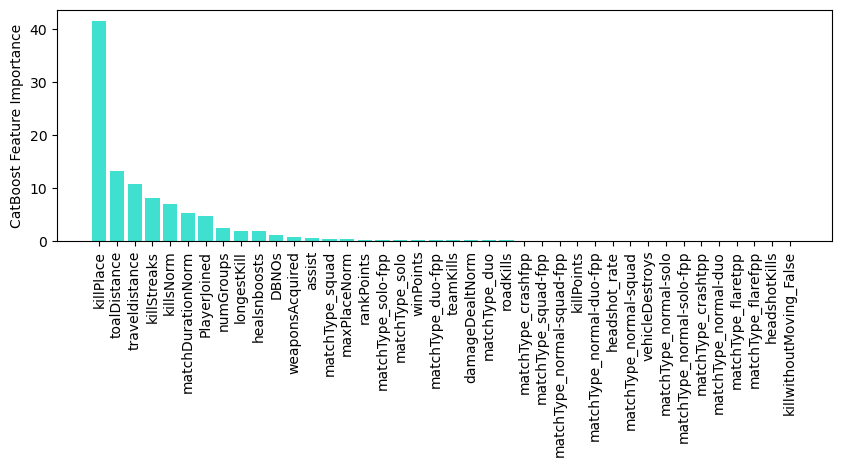

In [134]:
plt.figure(figsize=(10,3))
plt.bar(feature_importance_df.features, feature_importance_df.importance, color='turquoise')
plt.ylabel("CatBoost Feature Importance")
plt.xticks(rotation = 90)
plt.show()

# Prediction

In [129]:
pred = model.predict(xtest)

In [130]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.08
R2: 0.93
